In [1]:

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import sklearn

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt
import seaborn as sns

from sklearn.metrics import r2_score
import joblib #model persistence

In [2]:
df = pd.read_csv("/home/kduah/Desktop/Datainu.csv")

In [3]:
df.head()

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP,Vp(m/s),Vs(m/s)
0,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174,8.110300,5.666099
1,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393,8.123477,5.676695
2,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027,8.077544,5.639758
3,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237,7.987220,5.567123
4,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129,7.961783,5.546668


In [4]:
df.shape

(13131, 14)

In [5]:
y = df['Vs(m/s)'] #target variable
X = df[['NPHI','RHOB','GR','LLD','LLS']] #data with high R-square coefficient are used in the prediction

In [6]:
X

,NPHI,RHOB,GR,LLD,LLS
0,0.4397,2.2471,54.8415,0.9879,1.0776
1,0.4255,2.2587,55.8918,0.9906,1.0821
2,0.4351,2.2589,57.2492,0.9823,1.0876
3,0.4469,2.2546,58.0199,0.9660,1.0079
4,0.4353,2.2515,58.2939,0.9360,1.0188
...,...,...,...,...,...
13126,0.2417,2.5226,115.5579,2.1704,2.5690
13127,0.2614,2.4981,115.3115,2.1827,2.5769
13128,0.2754,2.5023,114.8351,2.1733,2.5695
13129,0.2617,2.5252,115.0071,2.1579,2.5616


In [7]:
X.shape

(13131, 5)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPTH,13131.0,2598.337597,615.283554,1524.000000,2067.991800,2629.357200,3134.334600,3635.654400
CALI,13131.0,12.537325,2.107427,8.643100,11.030600,12.104500,13.873200,20.282900
GR,13131.0,87.235983,24.441441,28.004200,62.991050,98.395800,106.991700,131.366500
ILD,13131.0,2.383127,1.089810,0.581700,1.735400,2.218900,2.850300,9.117600
ITT,13131.0,0.095339,0.014940,0.059600,0.086300,0.091000,0.096800,0.180500
LLD,13131.0,2.396797,1.323735,0.597000,1.603350,2.171200,2.819900,28.348200
LLS,13131.0,2.667173,1.385152,0.675300,1.801850,2.447700,3.200650,29.775900
MSFL,13131.0,2.561160,2.395647,0.209000,1.171900,1.806700,3.515500,75.173600
NPHI,13131.0,0.257420,0.065861,0.037200,0.210700,0.243500,0.285300,0.490900
RHOB,13131.0,2.418670,0.121271,1.750600,2.356250,2.440400,2.503650,2.692100


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
SEED = 42

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
joblib.dump(regressor.fit(X_train, y_train), 'Multiple_regression.joblib') #model persistence

['Multiple_regression.joblib']

In [15]:
print(regressor.intercept_)

10.00002792117926


In [16]:
print(regressor.coef_)

[-1.06802737e+01 -4.36057640e-01  1.03812566e-02  1.28998012e-02
  2.30548082e-01]


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze(), 'Difference': y_test-y_pred.squeeze()})

In [19]:
print(df_preds)

         Actual  Predicted  Difference
4320   7.512070   8.238716   -0.726646
2236   7.904033   7.498263    0.405770
3578   7.894501   8.006013   -0.111512
9928   8.451527   8.295577    0.155950
5762   7.913586   8.053042   -0.139456
...         ...        ...         ...
5434   8.939004   8.870011    0.068993
8440   7.512070   7.298321    0.213749
5748   8.169485   8.095154    0.074331
88     5.546668   5.453988    0.092680
10976  8.271929   8.514596   -0.242667

[2627 rows x 3 columns]


In [20]:
r2_score(y_test, y_pred)

0.8401953519821642

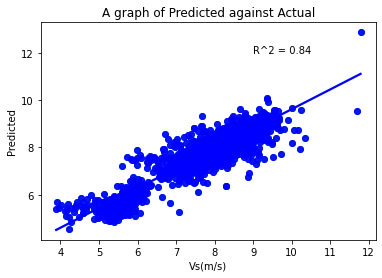

In [21]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.annotate("R^2 = {:.2f}".format(r2_score(y_test, y_pred)), (9,12))
sns.regplot(x=y_test, y=y_pred, ci = None, color = 'blue').set(title='A graph of Predicted against Actual')
plt.savefig("MLR.jpg")
#plt.annotate("R^2 = {:.3f}".format(r2_score(y_test, y_pred)), (9,12))
plt.show()



In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [24]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')   #error to two decimal places
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.32
Mean squared error: 0.20
Root mean squared error: 0.44


In [25]:
regress_test_score = regressor.score(X_test, y_test) # our current model explains 85% of the test data
print(f'regress_test_score: {regress_test_score:.2f}')

regress_test_score: 0.84


In [26]:
regress_train_score = regressor.score(X_train, y_train) # our current model explains 84% of the train data
print(f'regress_train_score: {regress_train_score:.2f}')

regress_train_score: 0.84


In [27]:
#Wonderful fit by all standards, the closer the MAE AND RMSE to zero the better the fit
#The RMSE indicates addition or subtraction of 0.44 was needed averagely to make accurate predictions.

In [28]:
#Scatterplots for multiple regression

In [29]:
#using only two columns are referred to us linear regression , three or > features is referred us M regression.

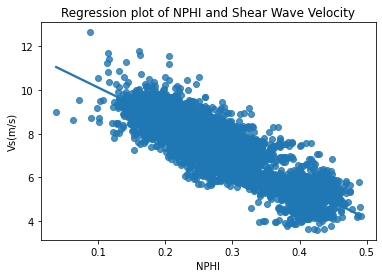

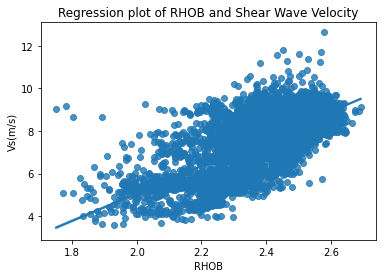

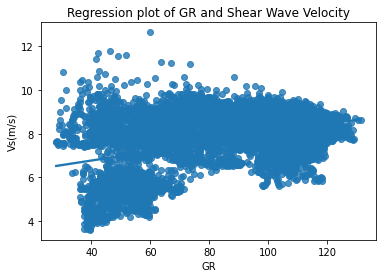

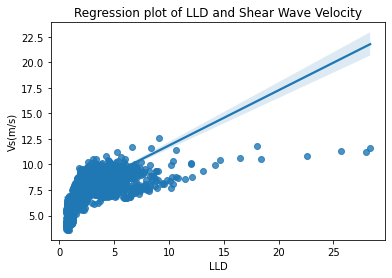

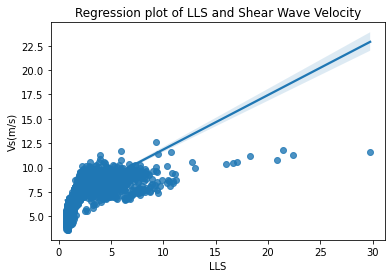

In [30]:
import seaborn as sns
variables = ['NPHI','RHOB','GR','LLD','LLS']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Vs(m/s)',data=df).set(title=f'Regression plot of {var} and Shear Wave Velocity');
    
    plt.show()

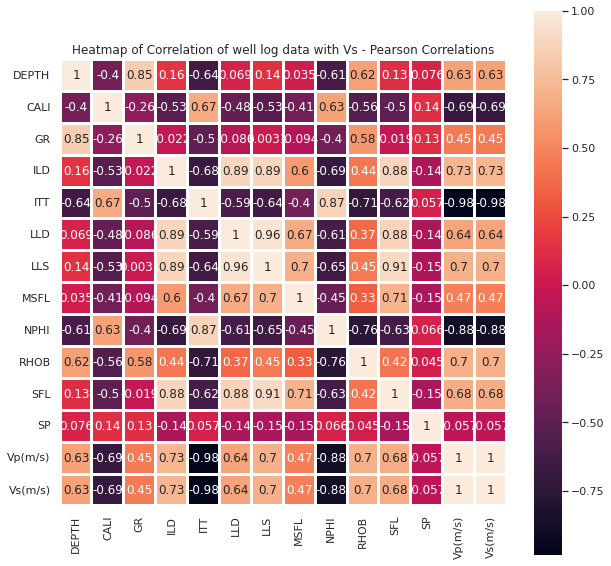

In [31]:
correlations = df.corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(correlations, annot=True, square=True, linewidths=2).set(title='Heatmap of Correlation of well log data with Vs - Pearson Correlations')
plt.savefig("Heatmap.jpg")

In [32]:
#plot the log of dataset against the other

<Figure size 720x720 with 0 Axes>

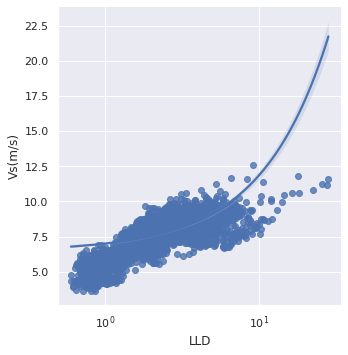

<Figure size 720x720 with 0 Axes>

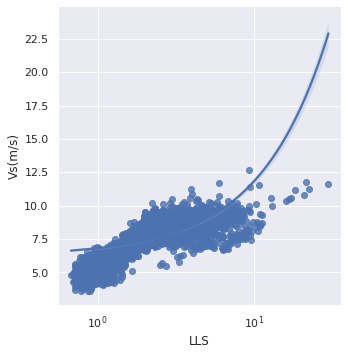

In [33]:
var_x = ['LLD','LLS']
for v in var_x:
    plt.figure()
    sns.lmplot(x=v, y='Vs(m/s)',data=df)
    plt.xscale('log')
    
    
